# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования**

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая поможет отследить аномалии и мошенническую деятельность. 
3. Определить факторы, влияющие на стоимость жилья.

**Ход исследования**

Архивные данные об объектах недвижимости находятся в файле `'/datasets/real_estate_data.csv'`. Прежде, чем начать анализ, взглянем на данные.

Проверим данные на предмет пропусков, ошибок и аномалий, после чего постараемся исправить выявленные в данных проблемы, при этом сделать это нужно максимально аккуратно во избежание искажения общего облика данных.

Исследование будет включать в себя следующие этапы:

- обзор данных;
- предобработка данных;
- расчет и добавление дополнительных данных в таблицу;
- проведение исследовательского анализа данных;
- общий вывод.

### Обзор данных

In [1]:
# импортируем библиотеки, с которыми собираемся работать
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# посмотрим общую информацию о датафрейме
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# выведем 15 первых строк датафрейма
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


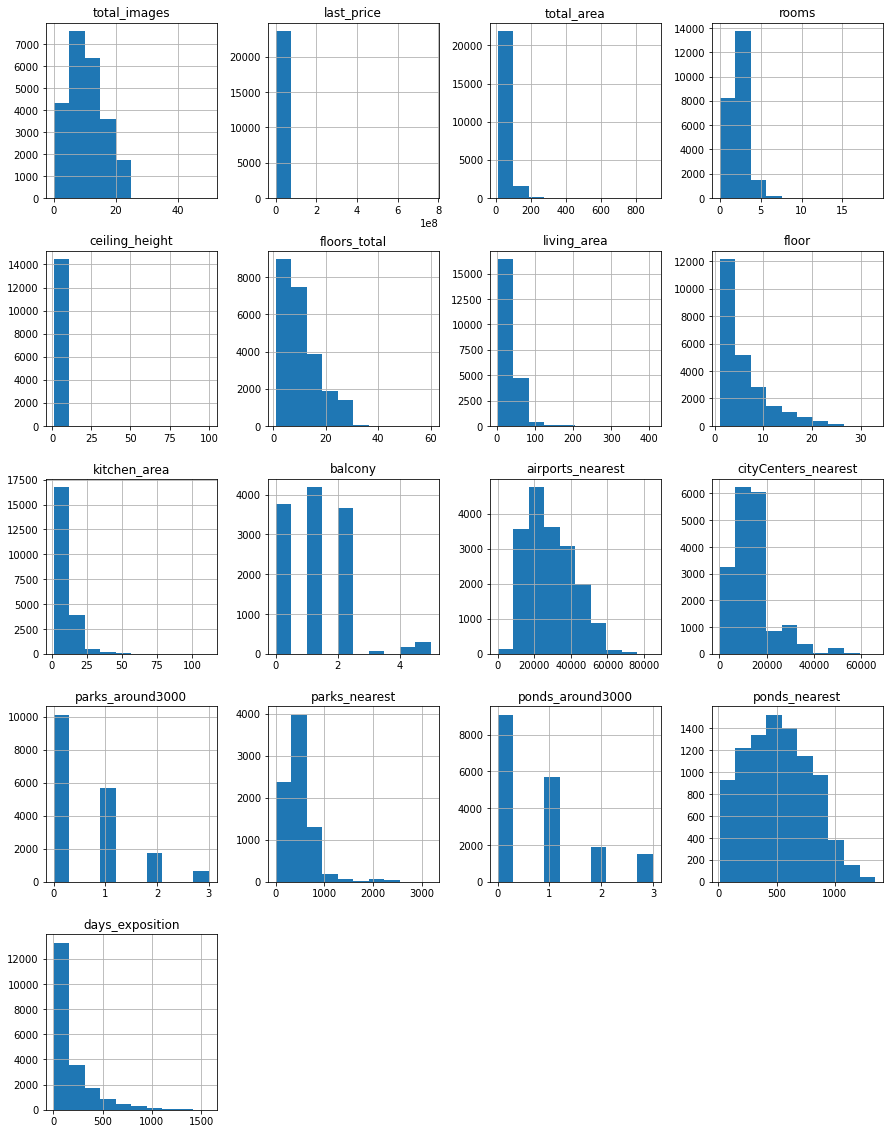

In [4]:
# построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

### Предобработка данных

In [5]:
# взглянем на пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# проверим колличество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В датафрейме имеются пропущенные значения в следующих столбцах:
- ceiling_height — высота потолков (м);
- floors_total — всего этажей в доме;
- living_area — жилая площадь в квадратных метрах (м²);
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- balcony — число балконов;
- locality_name — название населённого пункта;
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- cityCenters_nearest — расстояние до центра города (м);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Для начала переименуем столбцы 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000', переведем их в "змеиный" регистр.

In [7]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 
                       'parks_around3000':'parks_around_3000', 
                       'ponds_around3000':'ponds_around_3000'}, inplace = True)

Ниже будет описано, какие манипуляции производились со значениями в столбцах.

***Столбец 'floors_total'***

В столбце обнаружено 86 пропусков, но заполнить количество этажей в доме не представляется возможным, к тому же число пропусков небольшое, удаление не сильно повлияет на данные, поэтому удаляем. Также поменяем тип данных у значений в столбце с `float64` на `int64`, так как количество этажей - это целое число.

In [8]:
data = data.dropna(subset=['floors_total'])

In [9]:
data['floors_total'] = data['floors_total'].astype('int')

Причиной пропусков в данном столбце может быть человеческий фактор или сбой при выгрузке данных.

***Столбец 'is_apartment'***

In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце обнаружено 20924 пропуска. Так как прямо не указано на то, что это аппартаменты, то будем считать, что пропущенные значения - это не аппартаменты, соответственно, заполним пропуски значением 'False'. Также можно было заметить, что у значений в столбце тип данных `object`, а должен быть `bool`, поменяем сразу.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool')

Причиной пропусков в данном столбце, скорее всего, является то, что так как при внесении в базу данных о квартире, не являющейся аппартаментами, заполнение данного столбца просто игнорировалось пользователем.

***Столбец 'balcony'***

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменим пропуски на 0. Также сразу заменим у значений в столбце тип данных `float64` на `int64`, так как количество балконов - это целое число.

In [12]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Причиной пропусков в данном столбце, скорее всего, является то, что так как при внесении в базу данных о квартире, не имеющей балкона, заполнение данного столбца просто игнорировалось пользователем.

***Столбец 'locality_name'***

В столбце обнаружено 49 пропусков, но заполнить названия населенных пунктов не представляется возможным, к тому же число пропусков небольшое, удаление не сильно повлияет на данные, поэтому удаляем.

In [13]:
data = data.dropna(subset=['locality_name'])

Причиной пропусков в данном столбце может быть человеческий фактор или сбой при выгрузке данных.

Также в столбце встречаются неявные дубликаты - названия одних и тех же населенных пунктов, написанные по-разному. Избавимся от неявных дубликатов, уберем обозначение населенного пункта, оставим только название.

In [14]:
data['locality_name'] = data['locality_name'].replace(
    ['городской ', 'поселок ', 'посёлок ', 'городского типа ', 'деревня ', 'коттеджный ', 'при железнодорожной станции ', 
     'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село '], '', regex=True)

In [15]:
# проверка
len(list(data['locality_name'].sort_values(ascending=False).unique()))

305

***Столбцы 'airports_nearest' и 'city_centers_nearest'***

В целом по датасету в каждом из этих столбцов больше 5.5 тыс. пропущенных зачений, но если сделать срез по Санкт-Петербургу, то пропусков в каждом из столбцов остается меньше 100, исходя из этого становится понятно, что в населенных пунктах Ленинградской области может и не быть центра города как такового и по этой же причине не заполнены значения расстояния до аэропорта.

In [16]:
data.query('locality_name == "Санкт-Петербург"').isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          5555
floors_total               0
living_area             1117
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1343
balcony                    0
locality_name              0
airports_nearest          84
city_centers_nearest      60
parks_around_3000         60
parks_nearest           8400
ponds_around_3000         60
ponds_nearest           7715
days_exposition         2074
dtype: int64

Поэтому для Санкт-Петербурга пропущенные значения в этих столбцах заполним медианными значениями, а для остальных населенных пунктов оставим как есть.

In [17]:
data.loc[(data['locality_name'] == "Санкт-Петербург") & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
data.loc[(data['locality_name'] == "Санкт-Петербург"), 'city_centers_nearest'].median()

In [18]:
data.loc[(data['locality_name'] == "Санкт-Петербург") & (data['airports_nearest'].isna()), 'airports_nearest'] = \
data.loc[(data['locality_name'] == "Санкт-Петербург"), 'airports_nearest'].median()

***Столбец 'ceiling_height'***

В столбце обнаружено 9195 пропусков, их можно было бы заполнить медианным значением всего столбца, но в этом случае полученное значение может искажать действительность, так как в центре Санкт-Петербурга находится старый жилой фонд, в котором высота потолков как правило больше, чем в домах более современной постройки.

Будем считать центром города все, что находится в радиусе 7 км. Заполним пропущенные значения центра и всего, что за его пределами соответствующими медианами. Останутся пропуски в населенных пунктах Ленинградской области, их заполним медианой по столбцу.

In [19]:
data.loc[(data['city_centers_nearest'] < 7000) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
data.loc[(data['city_centers_nearest'] < 7000), 'ceiling_height'].median()

In [20]:
data.loc[(data['city_centers_nearest'] >= 7000) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
data.loc[(data['city_centers_nearest'] >= 7000), 'ceiling_height'].median()

In [21]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Посмотрим есть ли аномалии в этом столбце.

In [22]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724555
std          0.994426
min          1.000000
25%          2.600000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

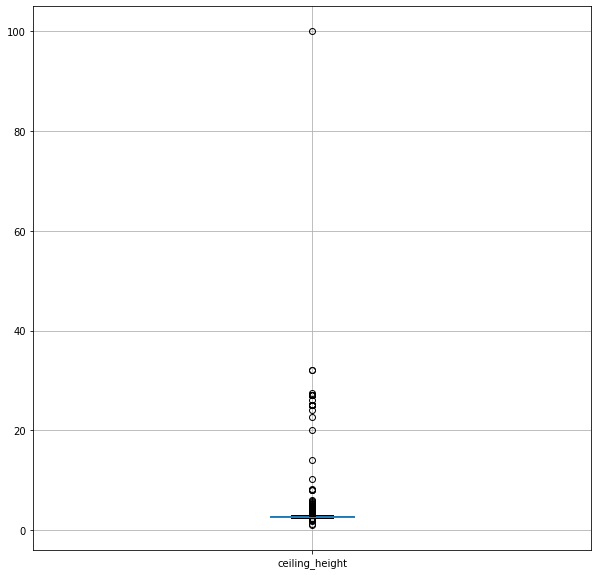

In [23]:
data.boxplot('ceiling_height', figsize=(10, 10));

Можно предположить, что потолки высотой до 10 м могут быть в элитном жилье, но скорее всего, все значения, что выше 20 м потеряли десятичную точку. При помощи цикла поделим такие значения на 10 и заменим на получившееся значение.

In [24]:
for height in data['ceiling_height']:
    if height >= 20:
        data['ceiling_height'] = data['ceiling_height'].replace({height: height / 10})

Посмотрим на оставшиеся "выбивающиеся" значения высоты потолка больше 10 м и меньше 2.2 м. Значения не типичны для подобных объектов. Заменим эти значения медианным для столбца.

In [25]:
data.query('ceiling_height < 2.2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15,17.5,6,True,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5,40.0,4,True,...,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18,16.6,9,True,...,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2,27.5,1,True,...,5.20,0,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5,NaN,5,True,...,NaN,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17,15.2,12,True,...,10.10,0,Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5,63.9,2,True,...,12.00,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5,20.0,5,False,...,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37,17.4,5,True,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17496,15,6700000.0,92.90,2019-02-19T00:00:00,3,2.00,17,53.2,14,True,...,12.00,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN


In [26]:
data.loc[(data['ceiling_height'] < 2.2), 'ceiling_height'] = data['ceiling_height'].median()

In [27]:
data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14,32.4,5,True,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


In [28]:
data.loc[(data['ceiling_height'] > 10), 'ceiling_height'] = data['ceiling_height'].median()

In [29]:
# проверка
data['ceiling_height'].describe()

count    23565.000000
mean         2.698430
std          0.250419
min          2.200000
25%          2.600000
50%          2.600000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

***Столбец 'living_area'***

В столбце обнаружено 1903 пропуска. Выведем коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади, после чего заполним пропуски отношением общей площади к коэффициенту.

In [30]:
total_living_ratio = data[data['total_area'].isnull() == False]['total_area'].mean() / \
data[data['living_area'].isnull() == False]['living_area'].mean()

In [31]:
data['living_area'] = data['living_area'].fillna(data['total_area'] / total_living_ratio).round(2)

Причиной пропусков в данном столбце может быть человеческий фактор или сбой при выгрузке данных.

***Столбец 'kitchen_area'***

В столбце обнаружено 2278 пропуска. По аналогии с предыдущим столбцом выведем коэффициент соотношения средней общей площади к среднему площади кухни, после чего заполним пропуски отношением общей площади к коэффициенту.

In [32]:
# посмотрим заполнена ли площадь кухни в квартирах-студиях и в квартирах с открытой планировкой
data.query('rooms == 1 and (studio == True or open_plan == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1379,3,6000000.0,44.20,2015-11-10T00:00:00,1,2.60,25,17.40,23,False,...,NaN,1,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,2.60,12,17.08,8,False,...,NaN,2,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,2.60,14,18.00,8,False,...,NaN,2,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.80,10,21.00,10,False,...,NaN,2,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
5668,9,3550000.0,36.70,2016-04-25T00:00:00,1,2.75,16,17.80,2,False,...,NaN,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.00,23,29.90,11,False,...,NaN,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
9063,6,3800000.0,39.00,2016-05-19T00:00:00,1,2.60,17,30.00,1,False,...,NaN,0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45.0
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,2.60,26,19.00,6,False,...,NaN,2,Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.50,8,22.30,5,False,...,NaN,1,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0
15142,2,2700000.0,30.00,2016-05-10T00:00:00,1,2.60,21,26.00,6,False,...,NaN,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0


In [33]:
total_kitchen_ratio = data[data['total_area'].isnull() == False]['total_area'].mean() / \
data[data['kitchen_area'].isnull() == False]['kitchen_area'].mean()

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / total_kitchen_ratio).round(2)

Причиной пропусков в данном столбце может быть человеческий фактор или сбой при выгрузке данных, а также то, что в квартирах-студиях и в квартирах с открытой планировкой нет как таковой кухни.

***Столбец 'rooms'***

In [35]:
data.query('studio == True')['rooms'].value_counts()

0    135
1     11
Name: rooms, dtype: int64

Так как в квартирах-студиях нет как таковых комнат, то приведем к единообразию и заменим значения количества комнат для этого типа квартир с 1 на 0.

In [36]:
data.loc[(data['rooms'] == 1) & (data['studio'] == True), 'rooms'] = 0

***Столбцы 'parks_around_3000' и 'ponds_around_3000'***

Будем считать, что если данные столбцы незаполенны, то это значит, что в радиусе 3 км нет парков и водоемов. Заменим данные пропуски на 0 и заменим у значений в столбце тип данных `float64` на `int64`, так как количество парков и водоемов - это целые числа.

In [37]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')

In [38]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')

***Столбцы 'parks_nearest' и 'ponds_nearest'***

В столбцах обнаружено большое количество пропусков, но заполнить расстояние до ближайшего парка или водоема не представляется возможным, так как данные пропуски, скорее всего, обусловлены отстутствием парков и водоемов в непосредственной близости от данных объектов недвижимости, поэтому оставим пропущенные значения без изменений.

***Столбец 'days_exposition'***

В столбце обнаружено 3181 пропуск. Скорее всего, пропуск в этой колонке означает, что объект не продан и объявление еще не закрыто, поэтому оставим пропущенные значения без изменений. Поменяем тип данных у заполненных значений в столбце с `float64` на `int64`, так как дни исчисляются целыми числами.

In [39]:
try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
    print('ok')
except:
    print('none')

ok


***Столбец 'first_day_exposition'***

Так как в столбце содержится информация о дате и времени размещения объявления, то поменяем тип данных у заполненных значений в столбце с `object` на `datetime64`.

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

***Столбец 'last_price'***

Проверим столбец на аномалии.

In [41]:
# посмотрим общую информацию
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

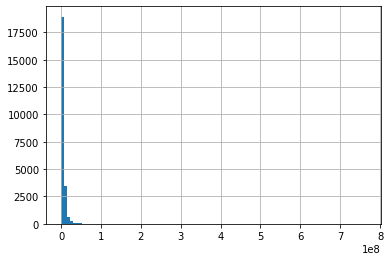

In [42]:
# постороим гистограмму
data['last_price'].hist(bins=100);

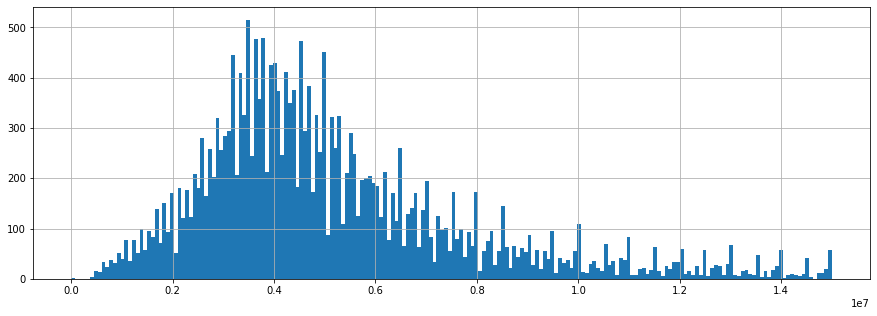

In [43]:
# сделаем гистограмму более детализированной
data['last_price'].hist(bins=200, range=(0, 15e6), figsize=(15, 5));

In [44]:
# посмотрим есть ли аномально низкая стоимость квартир
data.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8


Есть одна выбивающаяся строка, логично предположить, что подобная квартира не может столько стоить и цена указана в тысячах. Приведем к единообразию, умножим значение на 1000.

In [45]:
data.loc[(data['last_price'] == 12190.0), 'last_price'] = data['last_price'] * 1000

Теперь проверим датасет на явные дубликаты.

In [46]:
data.duplicated().sum()

0

***Итоги проведенной предобработки данных***

В ходе предобработки датасета во многих столбцах были обнаружены пропущенные значения, у некоторых значений в столбцах был неподходящий тип данных, встречались аномальные значения, а также неявные дубликаты.

Пропущенные значения были с осторожностью заполнены подходящими по смыслу данными и/или соответствующими медианными значениями во избежание искажения общего облика данных.
Аномальные значения были заменены на типичные медианные либо логически подходящие.
Неявные дубликаты были устранены, приведены к единообразию.

Там, где заполнить пропуски не представлялось возможным, строки были удалены.

Причинами пропусков в столбцах может являться то, что в связи с особенностями конкретного объекта, заполнение конкретного столбца по той или иной причине игнорировалось пользователем, а также человеческий фактор или сбой при выгрузке данных.

### Расчет и добавление дополнительных данных в таблицу

Добавим в таблицу новые столбцы со следующими параметрами:

•	цена одного квадратного метра;

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

•	месяц публикации объявления;

•	год публикации объявления;

•	тип этажа квартиры (значения — «первый», «последний», «другой»);

•	расстояние до центра города в километрах (из м в км и округлим до целых значений).

In [47]:
# цена одного квадратного метра
data['price_sq_m'] = (data['last_price'] / data['total_area']).round(2)

In [48]:
# день недели публикации объявления
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [49]:
# месяц публикации объявления
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [50]:
# год публикации объявления
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [51]:
# создадим функцию для присвоения типа этажу
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [52]:
# тип этажа квартиры
data['floor_type'] = data.apply(floor_type, axis=1)

In [53]:
# расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000)

In [54]:
# округлим и переведем в целочисленный формат
try:
    data['city_centers_nearest_km'] = np.floor(pd.to_numeric(data['city_centers_nearest_km'], errors='coerce')).astype('Int64')
    print('ok')
except:
    print('none')

ok


In [55]:
# проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.60,1,True,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.30,4,True,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,90.82,9,True,...,84.0,3,234.0,424,408176.10,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8


### Проведение исследовательского анализа данных

#### Более детальное рассмотрение основных параметров

Изучим следующие параметры объектов: 

- общая площадь;

- жилая площадь;

- площадь кухни;

- цена объекта;

- количество комнат;

- высота потолков;

- этаж квартиры;

- тип этажа квартиры («первый», «последний», «другой»);

- общее количество этажей в доме;

- расстояние до центра города в метрах;

- расстояние до ближайшего аэропорта;

- расстояние до ближайшего парка;

- день и месяц публикации объявления.

In [56]:
# посмотрим общие характеристики интересующих нас параметров
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 
      'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'weekday_exposition', 
      'month_exposition']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.0,69.70,900.0
living_area,23565.0,3.459228e+01,2.237369e+01,2.0,19.00,30.0,42.10,409.7
kitchen_area,23565.0,1.049988e+01,6.037757e+00,1.3,7.00,9.0,12.00,112.0
last_price,23565.0,6.540575e+06,1.091091e+07,430000.0,3400000.00,4647000.0,6790000.00,763000000.0
rooms,23565.0,2.070189e+00,1.079270e+00,0.0,1.00,2.0,3.00,19.0
ceiling_height,23565.0,2.698430e+00,2.504193e-01,2.2,2.60,2.6,2.75,10.0
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.0,8.00,33.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.0,16.00,60.0
city_centers_nearest,18124.0,1.418620e+04,8.599808e+03,181.0,9256.25,13073.0,16275.00,65968.0
airports_nearest,18125.0,2.878766e+04,1.260395e+04,0.0,18591.00,26763.0,37227.00,84869.0


***Общая площадь***

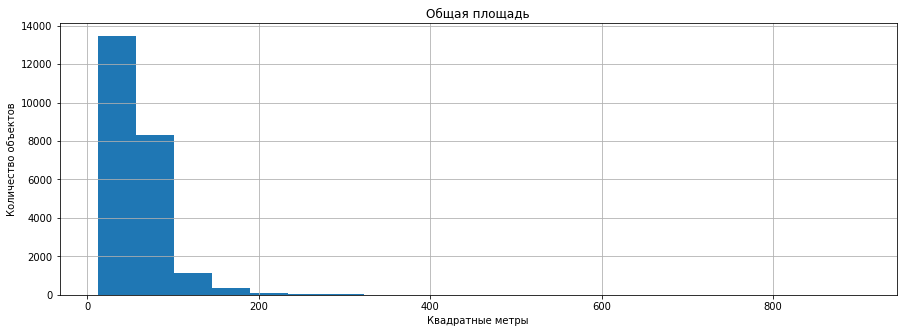

In [57]:
data['total_area'].hist(bins=20, range=(data['total_area'].min(), data['total_area'].max()), figsize=(15, 5));
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

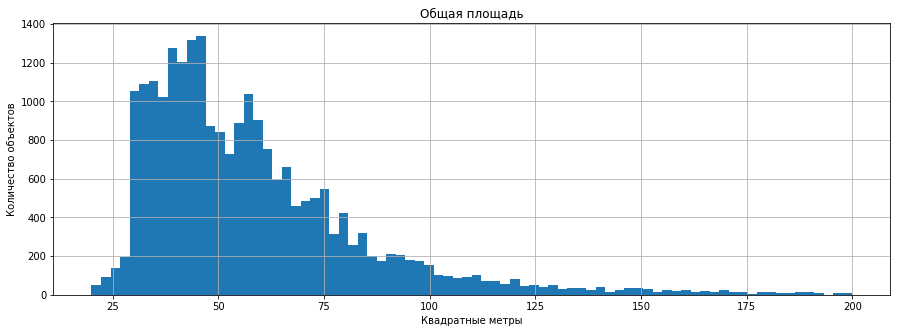

In [58]:
data['total_area'].hist(bins=80, range=(20, 200), figsize=(15, 5));
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

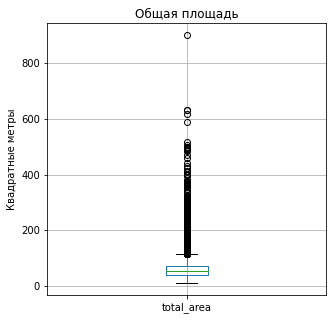

In [59]:
data.boxplot('total_area', figsize=(5, 5));
plt.title('Общая площадь')
plt.ylabel('Квадратные метры')
plt.show()

In [60]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Общая площадь объектов, представленных в таблице варьируется в диапазоне от 12 до 900 кв.м. Из построенных гистограмм и диаграммы размаха видно, что подавляющее число объектов имеет общую площадь от 25 до 75 кв.м. с пиковым значением в районе 45 кв.м.

***Жилая площадь***

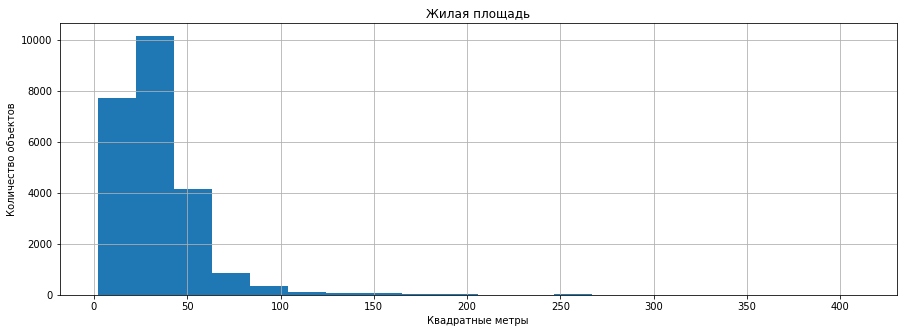

In [61]:
data['living_area'].hist(bins=20, range=(data['living_area'].min(), data['living_area'].max()), figsize=(15, 5));
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

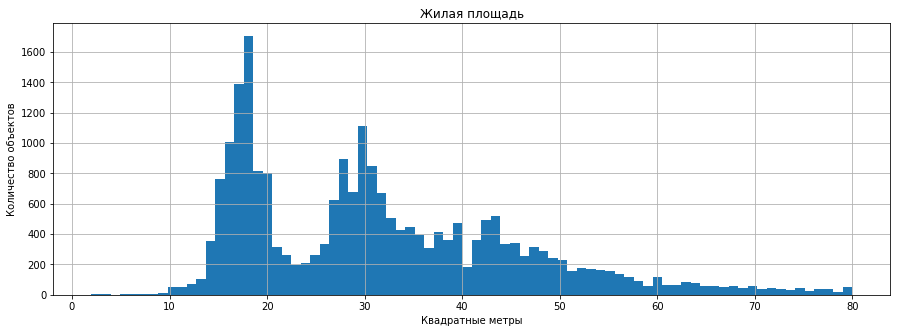

In [62]:
data['living_area'].hist(bins=80, range=(2, 80), figsize=(15, 5));
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

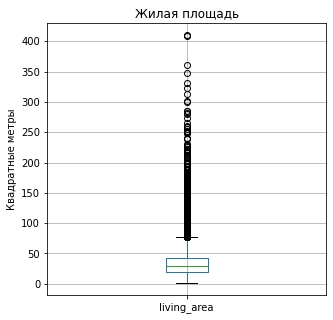

In [63]:
data.boxplot('living_area', figsize=(5, 5));
plt.title('Жилая площадь')
plt.ylabel('Квадратные метры')
plt.show()

In [64]:
data['living_area'].describe()

count    23565.000000
mean        34.592278
std         22.373689
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Из построенных гистограмм и диаграммы размаха видно, что подавляющее число объектов имеет жилую площадь от 15 до 45 кв.м. с пиковыми значениями в районе 18 и 30 кв.м.

***Площадь кухни***

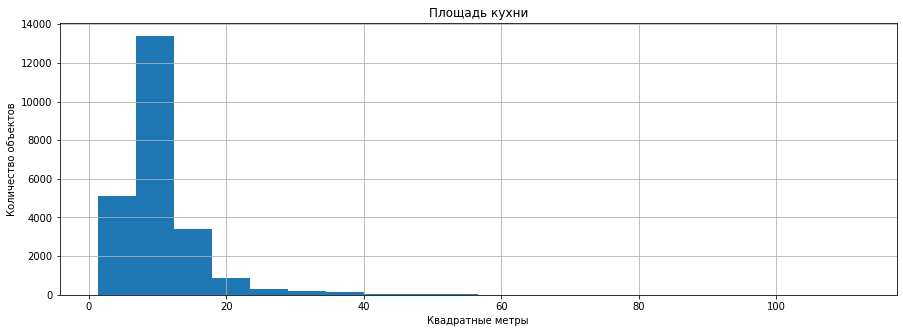

In [65]:
data['kitchen_area'].hist(bins=20, range=(data['kitchen_area'].min(), data['kitchen_area'].max()), figsize=(15, 5));
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

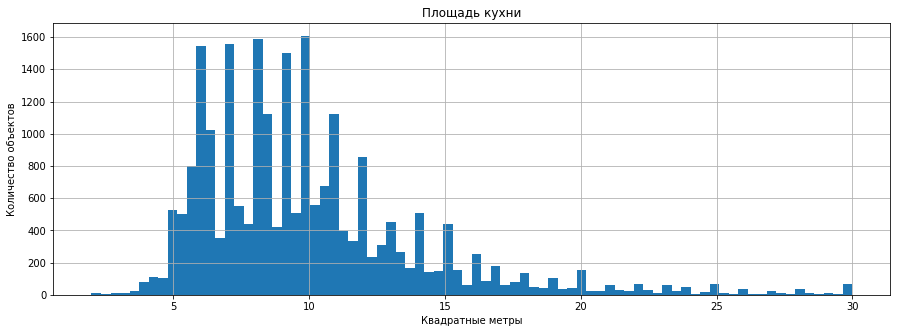

In [66]:
data['kitchen_area'].hist(bins=80, range=(2, 30), figsize=(15, 5));
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

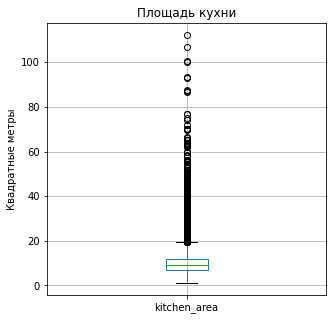

In [67]:
data.boxplot('kitchen_area', figsize=(5, 5));
plt.title('Площадь кухни')
plt.ylabel('Квадратные метры')
plt.show()

In [68]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499881
std          6.037757
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Из построенных гистограмм и диаграммы размаха видно, что подавляющее число объектов имеет площадь кухни от 5 до 15 кв.м.

***Цена объекта***

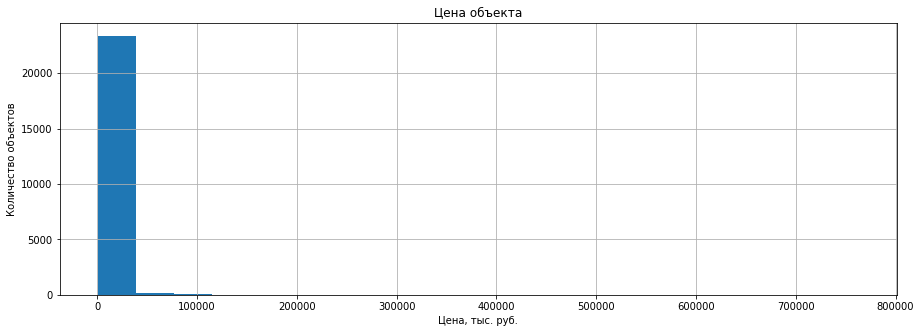

In [69]:
(data['last_price'] / 1000).hist(bins=20, range=((data['last_price'] / 1000).min(), (data['last_price'] / 1000).max()), figsize=(15, 5));
plt.title('Цена объекта')
plt.xlabel('Цена, тыс. руб.')
plt.ylabel('Количество объектов')
plt.show()

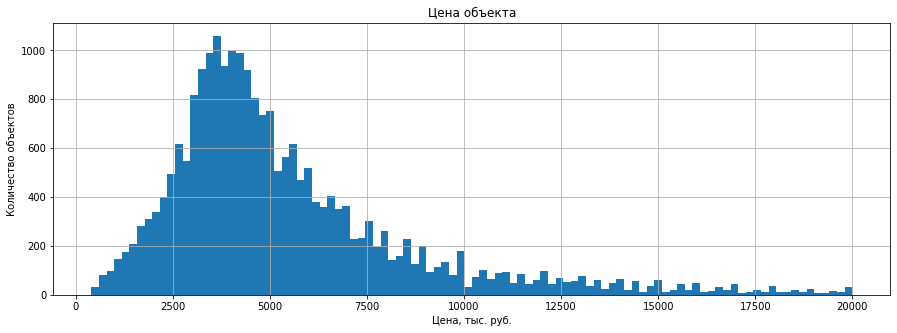

In [70]:
(data['last_price'] / 1000).hist(bins=100, range=(400, 20000), figsize=(15, 5));
plt.title('Цена объекта')
plt.xlabel('Цена, тыс. руб.')
plt.ylabel('Количество объектов')
plt.show()

In [71]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540575e+06
std      1.091091e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Стоимость объектов, представленных в таблице варьируется в диапазоне от 430 тыс. до 763 млн. руб. Из построенных гистограмм видно, что подавляющее число объектов имеет стоимость от 2 до 7 млн.руб. с пиковым значением в районе 3.5-4 млн. руб.

***Количество комнат***

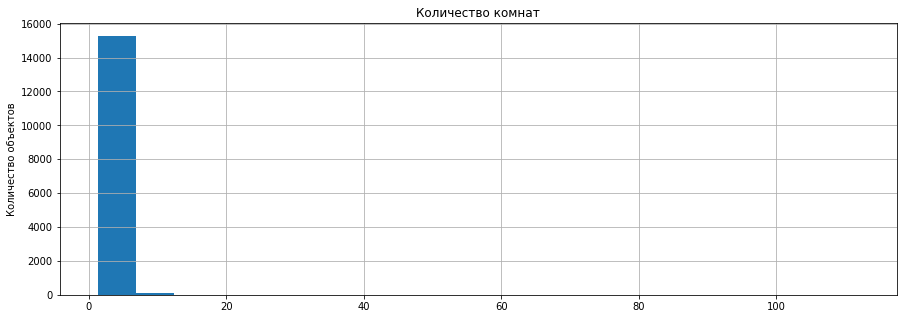

In [72]:
data['rooms'].hist(bins=20, range=(data['kitchen_area'].min(), data['kitchen_area'].max()), figsize=(15, 5));
plt.title('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

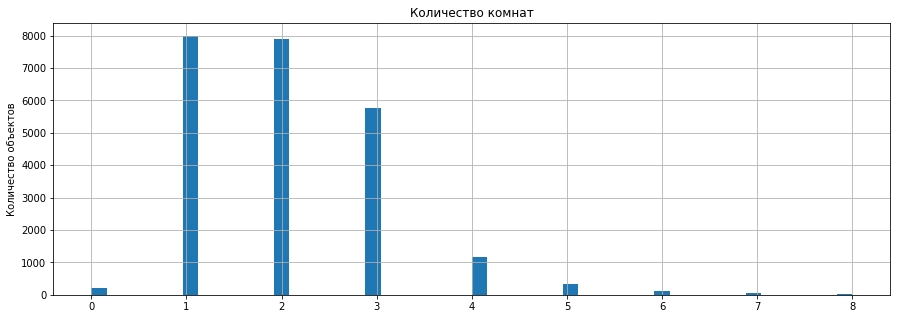

In [73]:
data['rooms'].hist(bins=50, range=(0, 8), figsize=(15, 5));
plt.title('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

In [74]:
data['rooms'].describe()

count    23565.000000
mean         2.070189
std          1.079270
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Из построенных гистограмм видно, что подавляющее число объектов имеет от 1 до 3 комнат.

***Высота потолков***

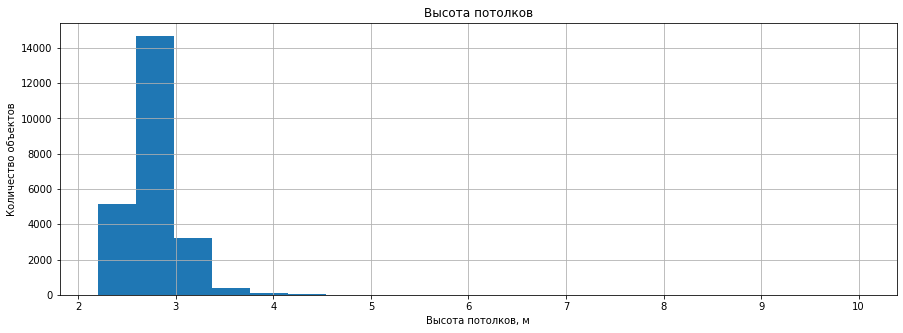

In [75]:
data['ceiling_height'].hist(bins=20, range=(data['ceiling_height'].min(), data['ceiling_height'].max()), figsize=(15, 5));
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объектов')
plt.show()

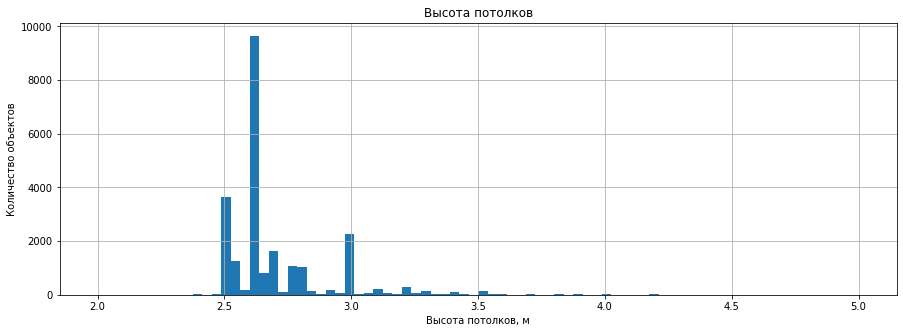

In [76]:
data['ceiling_height'].hist(bins=80, range=(2, 5), figsize=(15, 5));
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объектов')
plt.show()

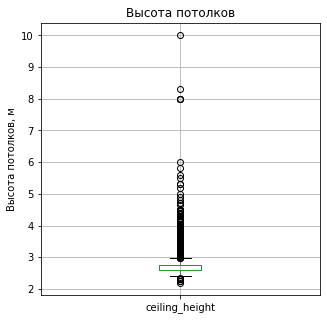

In [77]:
data.boxplot('ceiling_height', figsize=(5, 5));
plt.title('Высота потолков')
plt.ylabel('Высота потолков, м')
plt.show()

In [78]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.698430
std          0.250419
min          2.200000
25%          2.600000
50%          2.600000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

Высота потолков у объектов, представленных в таблице варьируется в диапазоне от 2.2 до 10 метров. Из построенных гистограмм и диаграммы размаха видно, что подавляющее число объектов имеет высоту потолка от 2.5 до 3 метров с пиковым значением в районе 2.7 метров.

***Этаж квартиры***

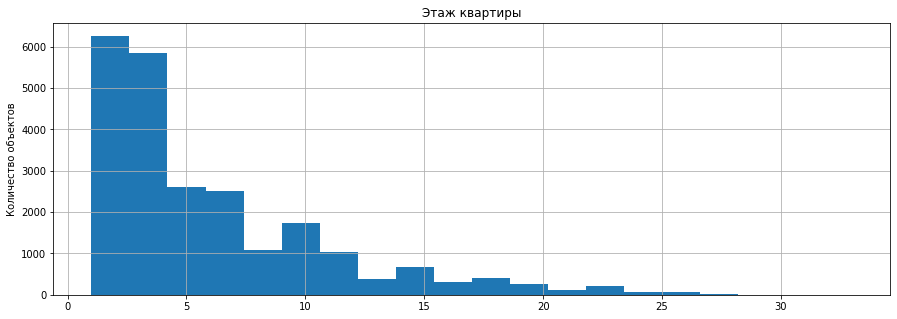

In [79]:
data['floor'].hist(bins=20, range=(data['floor'].min(), data['floor'].max()), figsize=(15, 5));
plt.title('Этаж квартиры')
plt.ylabel('Количество объектов')
plt.show()

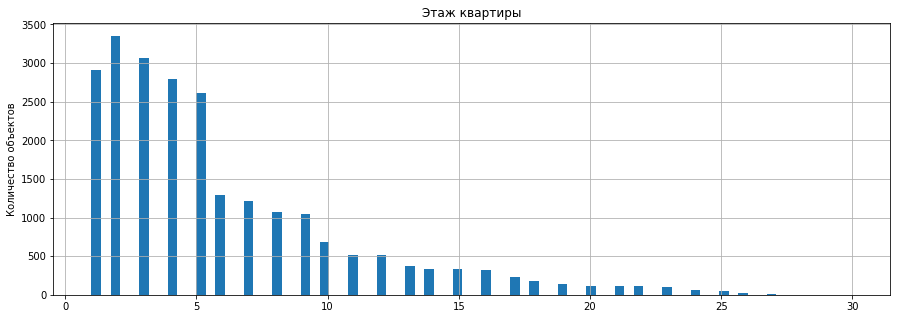

In [80]:
data['floor'].hist(bins=80, range=(1, 30), figsize=(15, 5));
plt.title('Этаж квартиры')
plt.ylabel('Количество объектов')
plt.show()

In [81]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Этаж у объектов, представленных в таблице варьируется в диапазоне от 1 до 33. Из построенных гистограмм видно, что большая часть объектов располагается в диапазоне с 1 по 10 этаж.

***Тип этажа квартиры***

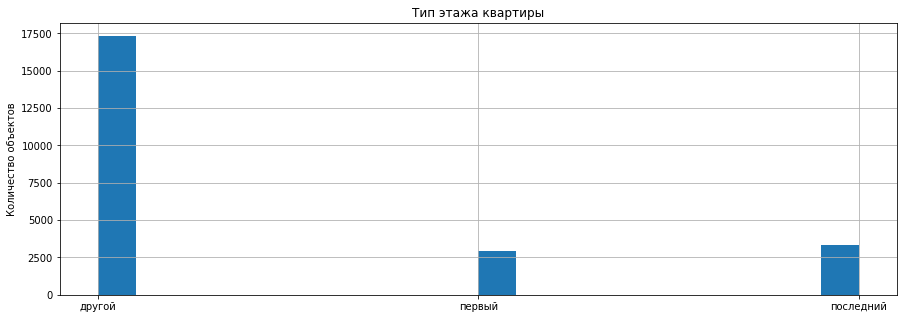

In [82]:
data['floor_type'].hist(bins=20, range=(data['floor_type'].min(), data['floor_type'].max()), figsize=(15, 5));
plt.title('Тип этажа квартиры')
plt.ylabel('Количество объектов')
plt.show()

In [83]:
data['floor_type'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

Большая часть объектов располагается не на первом и не на последнем этаже.

***Общее количество этажей в доме***

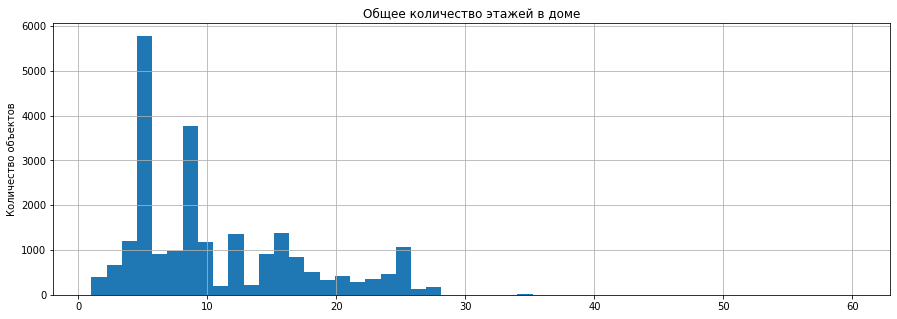

In [84]:
data['floors_total'].hist(bins=50, range=(data['floors_total'].min(), data['floors_total'].max()), figsize=(15, 5));
plt.title('Общее количество этажей в доме')
plt.ylabel('Количество объектов')
plt.show()

In [85]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Общее количество этажей варьируется в диапазоне от 1 до 60. Из построенной гистограммы видно, что большая часть объектов имеет общее количество этажей 5 или 9.

***Расстояние до центра города в метрах***

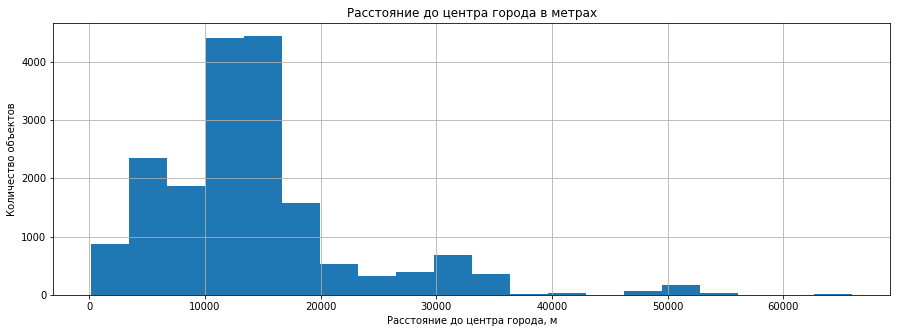

In [86]:
data['city_centers_nearest'].hist(bins=20, range=(data['city_centers_nearest'].min(), data['city_centers_nearest'].max()), figsize=(15, 5));
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество объектов')
plt.show()

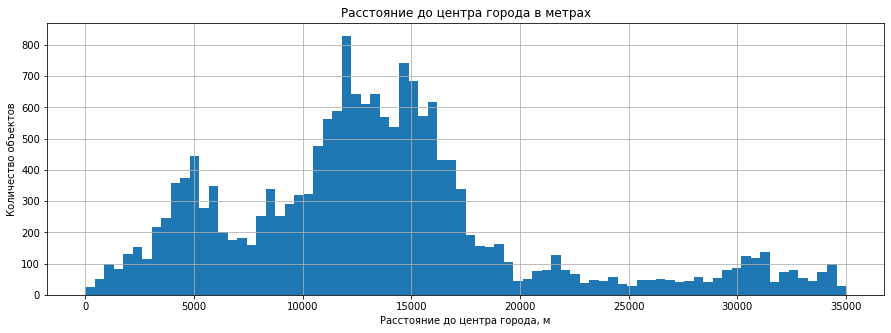

In [87]:
data['city_centers_nearest'].hist(bins=80, range=(0, 35000), figsize=(15, 5));
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество объектов')
plt.show()

In [88]:
data['city_centers_nearest'].describe()

count    18124.000000
mean     14186.198356
std       8599.808215
min        181.000000
25%       9256.250000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Расстояние до центра города у объектов, представленных в таблице достигает 65968 метров. Из построенных гистограмм видно, что подавляющее число объектов находится на удалении от центра от 3 до 19 км с пиковым значением в районе 12 км.

***Расстояние до ближайшего аэропорта***

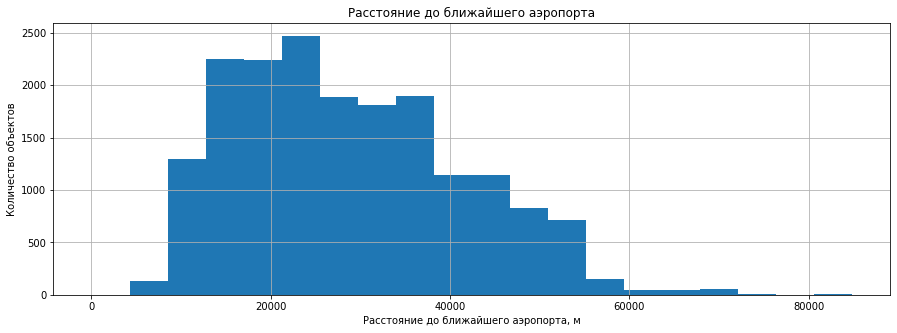

In [89]:
data['airports_nearest'].hist(bins=20, range=(data['airports_nearest'].min(), data['airports_nearest'].max()), figsize=(15, 5));
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Количество объектов')
plt.show()

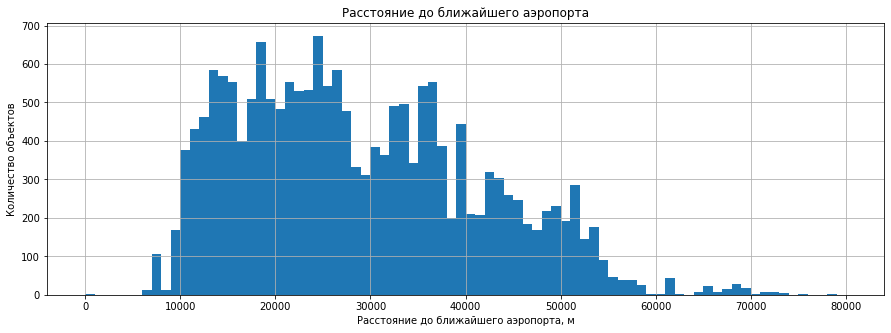

In [90]:
data['airports_nearest'].hist(bins=80, range=(0, 80000), figsize=(15, 5));
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Количество объектов')
plt.show()

In [91]:
data['airports_nearest'].describe()

count    18125.000000
mean     28787.655779
std      12603.948789
min          0.000000
25%      18591.000000
50%      26763.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Расстояние до ближайшего аэропорта у объектов, представленных в таблице достигает 84869 метров. Из построенных гистограмм видно, что подавляющее число объектов находится на удалении от аэропорта от 10 до 55 км с пиковым значением в районе 25 км.

***Расстояние до ближайшего парка***

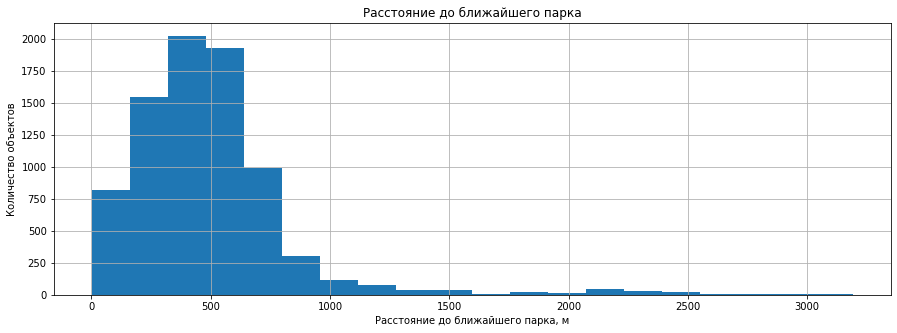

In [92]:
data['parks_nearest'].hist(bins=20, range=(data['parks_nearest'].min(), data['parks_nearest'].max()), figsize=(15, 5));
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество объектов')
plt.show()

In [93]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Расстояние до ближайшего парка у объектов, представленных в таблице достигает 3190 метров (если такая информация указана). Из построенной гистограммы видно, что подавляющее число объектов находится на удалении от парка до 1 км.

***День недели и месяц публикации объявления***

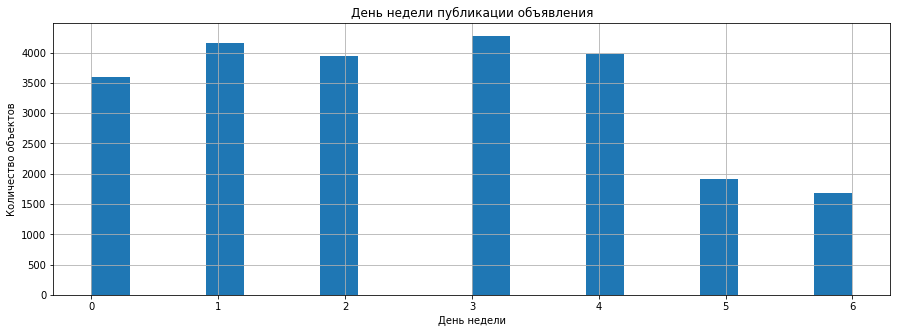

In [94]:
data['weekday_exposition'].hist(bins=20, range=(data['weekday_exposition'].min(), data['weekday_exposition'].max()), figsize=(15, 5));
plt.title('День недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объектов')
plt.show()

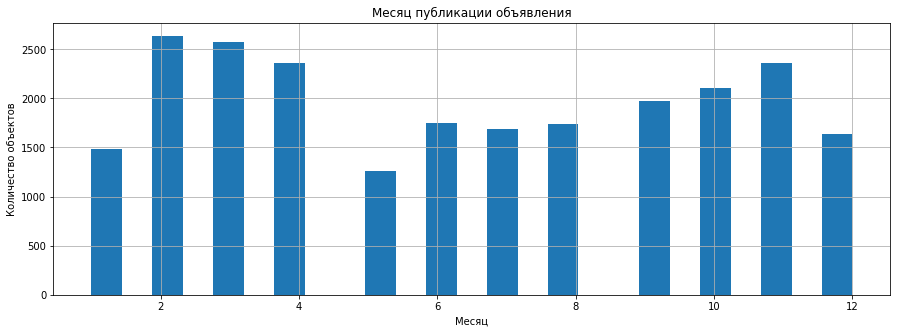

In [95]:
data['month_exposition'].hist(bins=25, range=(data['month_exposition'].min(), data['month_exposition'].max()), figsize=(15, 5));
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.show()

По дням недели публикации объявлений распределены равномерно, на будний день приходится в среднем в два раза больше объявлений, чем на выходной день. 

В разрезе помесячного распределения объвлений пики наблюдаются с февраля по апрель и с сентября по ноябрь.

#### Скорость продажи

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

- Построим гистограмму.

- Посчитаем среднее и медиану.

- Опишем, сколько времени обычно занимает продажа и ответим на вопрос какие продажи можно считать быстрыми, а какие — необычно долгими.

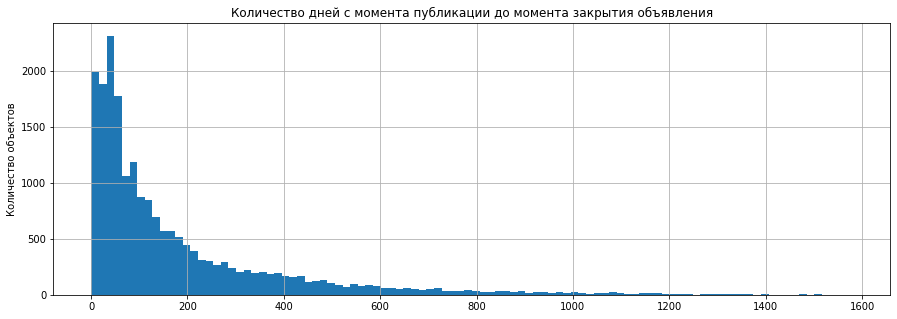

In [96]:
data['days_exposition'].hist(bins=100, range=(data['days_exposition'].min(), data['days_exposition'].max()), figsize=(15, 5));
plt.title('Количество дней с момента публикации до момента закрытия объявления')
plt.ylabel('Количество объектов')
plt.show()

In [97]:
print(f"Среднее значение количества дней, за которое продавали квартиру: {data['days_exposition'].mean().astype('int')} дней")

Среднее значение количества дней, за которое продавали квартиру: 180 дней


In [98]:
print(f"Медианное значение количества дней, за которое продавали квартиру: {data['days_exposition'].median().astype('int')} дней")

Медианное значение количества дней, за которое продавали квартиру: 95 дней


Из гистограммы можно увидеть, что большая часть квартир продается примерно в первые 100 дней. Рассмотрим более детально в разрезе этого отрезка времени.

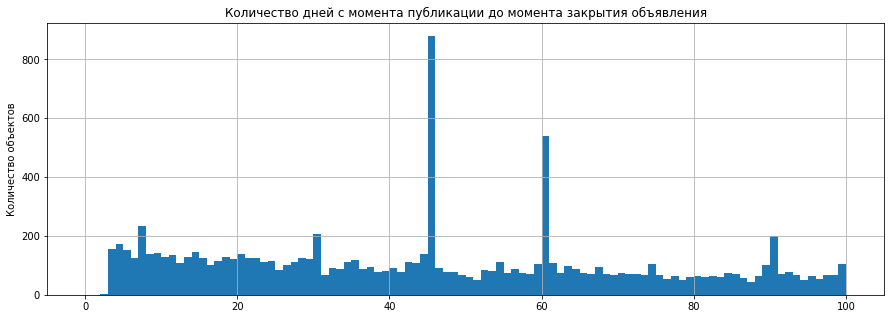

In [99]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(15, 5));
plt.title('Количество дней с момента публикации до момента закрытия объявления')
plt.ylabel('Количество объектов')
plt.show()

In [100]:
# возьмем срез по продажам за 45 и 60 дни с момента публикации 
# и построим сводную таблицу с основными характеристиками
data.query('days_exposition == [45, 60]').pivot_table(
    index='days_exposition', 
    values=['last_price', 'price_sq_m', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'city_centers_nearest_km'], 
    aggfunc='median')

,city_centers_nearest_km,kitchen_area,last_price,living_area,price_sq_m,rooms,total_area
days_exposition,,,,,,,
45,15.0,8.000,3250000.0,24.56,74324.32,1,43.0
60,13.0,10.195,5776000.0,33.70,100253.38,2,59.0


На гистограмме видны пики примерно на 45 и 60 днях. При этом за 45 дней, как правило, продаются более бюджетные квартиры (медианное описание объекта: однокомнатная квартира с общей площадью 43 кв.м., стоимостью 3.25 млн. руб. и удалением от центра 15 км), в то время как для продажи квартиры классом повыше займет до 60 дней (медианное описание объекта: двухкомнатная квартира с общей площадью 59 кв.м., стоимостью 5.78 млн. руб. и удалением от центра 13 км).

Построим диаграмму размаха по столбцу 'days_exposition', чтобы посмотреть характерный разброс времени продажи квартиры. Также возпользуемся методом `describe()`, чтобы более детально посмотреть на числовое описание данных в столбце.

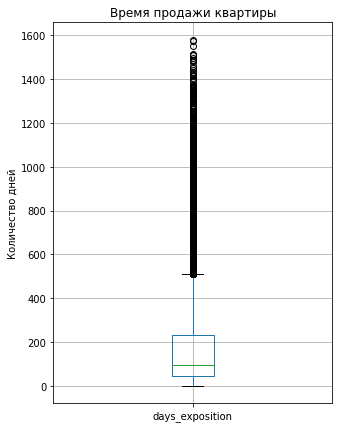

In [101]:
data.boxplot('days_exposition', figsize=(5, 7));
plt.title('Время продажи квартиры')
plt.ylabel('Количество дней')
plt.show()

In [102]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из диаграммы размаха видно, что 25 перцентиль попадает на отметку 45 дней, соответсвенно, если квартиру продали в пределах 45 дней, то такую сделку можно считать быстрой. 
75 перцентиль попадает на отметку 231 день, поэтому продажу дольше 231 дня можно считать долгой. Если же квартира продается более 500 дней (выбросы на диаграмме), то такая продажа будет аномально долгой.

#### Факторы, влияющие на стоимость

Проверим какие факторы больше всего влияют на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:

- общей площади;

- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией будем использовать сводные таблицы в том числе.

Для начала посмотрим на корреляцию между стоимостью квартиры, ее площадью и количеством комнат.

In [103]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653687,0.585676,0.514768,0.363108
total_area,0.653687,1.000000,0.946232,0.660243,0.758657
living_area,0.585676,0.946232,1.000000,0.502346,0.827302
kitchen_area,0.514768,0.660243,0.502346,1.000000,0.326036
rooms,0.363108,0.758657,0.827302,0.326036,1.000000


Корреляция хорошая. Построим диаграмму рассеивания для каждого из параметров.

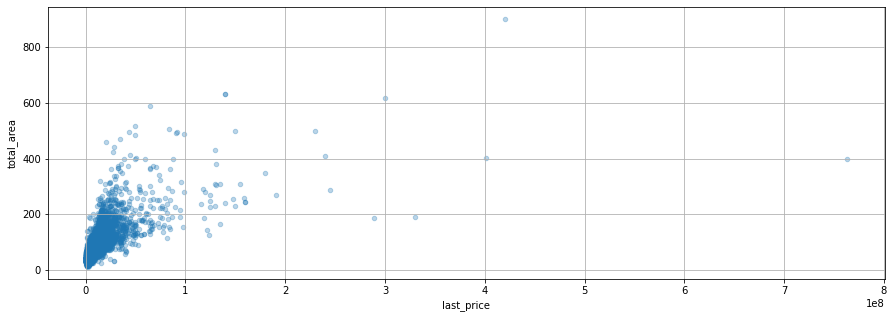

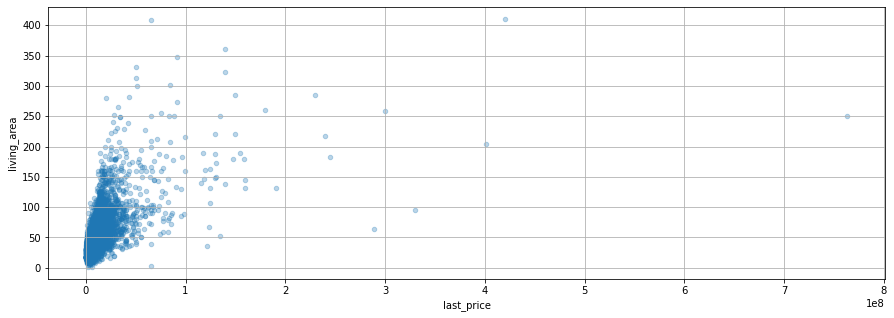

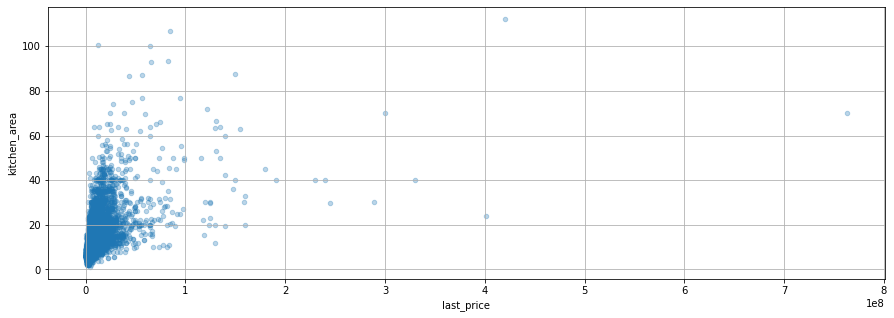

In [104]:
data.plot(x='last_price', y='total_area', kind='scatter', grid=True, figsize=(15, 5), alpha=0.3);
data.plot(x='last_price', y='living_area', kind='scatter', grid=True, figsize=(15, 5), alpha=0.3);
data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, figsize=(15, 5), alpha=0.3);

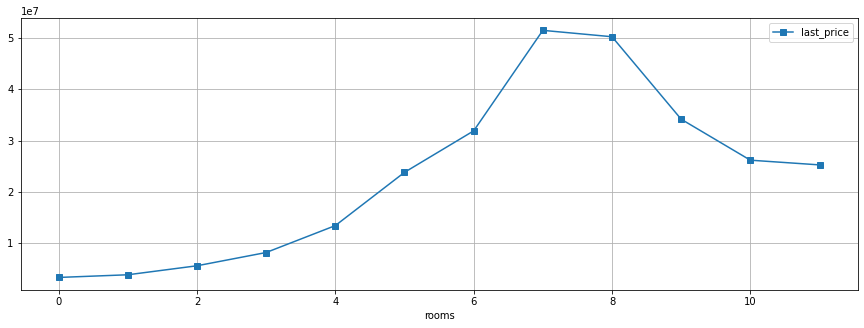

In [105]:
# для визуализации корреляции стоимости и количества комнат больше подойдет график
data.query('0 <= rooms < 12').pivot_table(index='rooms', values='last_price').plot(grid=True, style='s-', figsize=(15, 5));

Прослеживается взаимосвязь между стоимостью квартиры и ее общей, жилой и кухонной площадью, что логично, но она не слишком сильная, так как на стоимость помимо этих факторов влияет еще множество других. Взаимосвязь между стоимостью и количеством комнат также имеется, ведь как правило, чем больше комнат, тем больше площадь, хотя, это опять же зависит от площади комнат.

Посмотрим, как зависит стоимость квадратного метра от этажа, на котором располагается квартира.

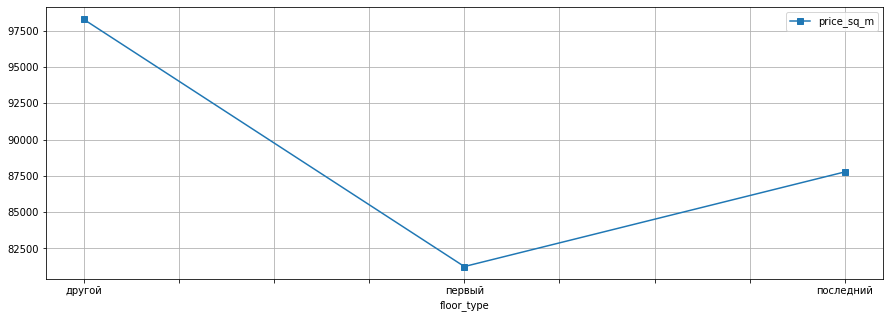

In [106]:
 data.pivot_table(index='floor_type', values='price_sq_m', aggfunc='median').plot(grid=True, style='s-', figsize=(15, 5));

Из графика видно, что стоимость первых и последних этажей ниже, чем стоимость других этажей, при этом первый этаж, как правило, оценивается ниже, чем последний.

Корреляции между стоимостью квадратного метра и днем, месяцем, годом близки к нулю. Построим график.

In [107]:
data[['price_sq_m', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr()

,price_sq_m,weekday_exposition,month_exposition,year_exposition
price_sq_m,1.000000,-0.007147,-0.001997,0.008776
weekday_exposition,-0.007147,1.000000,0.012019,-0.002985
month_exposition,-0.001997,0.012019,1.000000,-0.271567
year_exposition,0.008776,-0.002985,-0.271567,1.000000


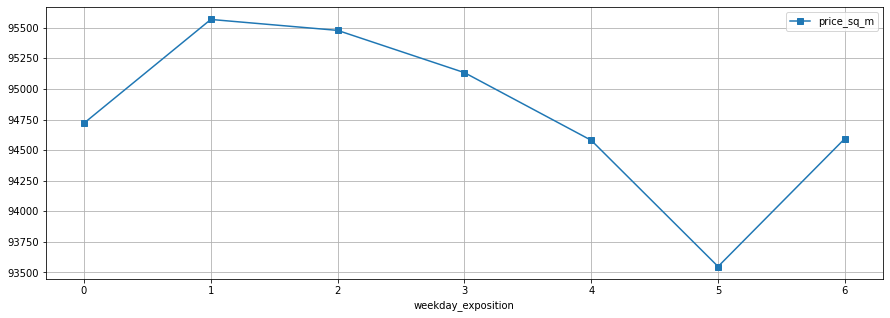

In [108]:
data.pivot_table(index='weekday_exposition', values='price_sq_m', aggfunc='median').plot(grid=True, style='s-', figsize=(15, 5));

Из графика видно, что стоимость кв. метра в объявлениях, опубликованных во вторник и среду выше и к субботе постепенно снижается, после чего ко вторнику обратно повышется. Но разница между пиками значений незначительная, до 2 тыс. руб. за кв.м. Скорее всего, это может быть связано с большей деловой активностью в начале рабочей недели.

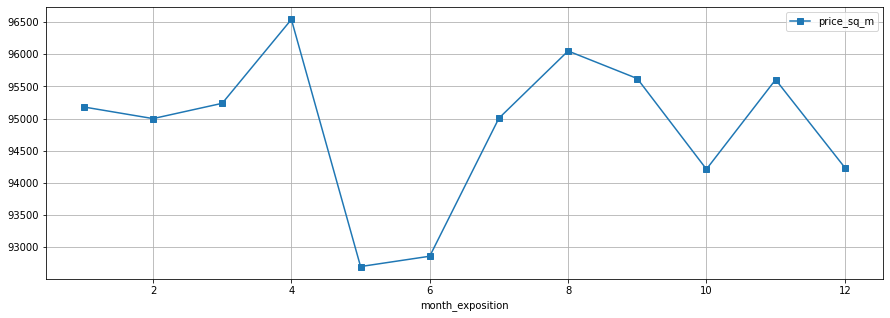

In [109]:
data.pivot_table(index='month_exposition', values='price_sq_m', aggfunc='median').plot(grid=True, style='s-', figsize=(15, 5));

В разрезе помесячного изменения стоимости жилья можно увидеть, что пиковые значения стоимости за квадратный метр объекты достигают в апреле и августе. Спад между этими пиками может быть обусловлен сезонностью отпусков и падением спроса в эти периоды. Разница между пиками значений достигает 4 тыс. руб. за кв.м. 

*Небольшая ремарка: к выводу о помесячном изменении стоимости нужно относиться с осторожностью, так как он делался на основе даты публикации объявления и цены на момент снятия с публикации, и, возможно, цена менялась на протяжении всего временного периода продажи квартиры, а этот период может быть от нескольких недель до года и даже более.*

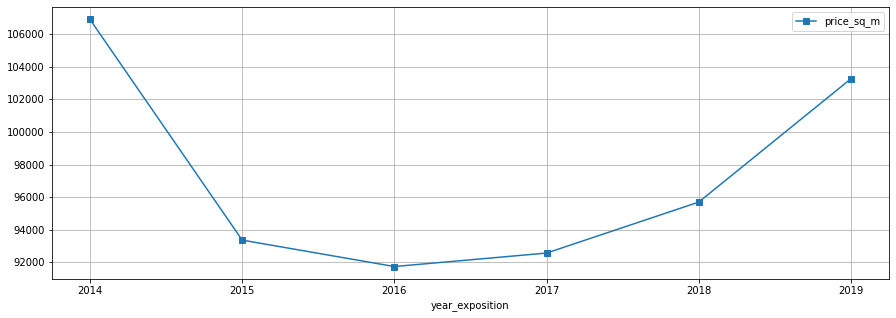

In [110]:
data.pivot_table(index='year_exposition', values='price_sq_m', aggfunc='median').plot(grid=True, style='s-', figsize=(15, 5));

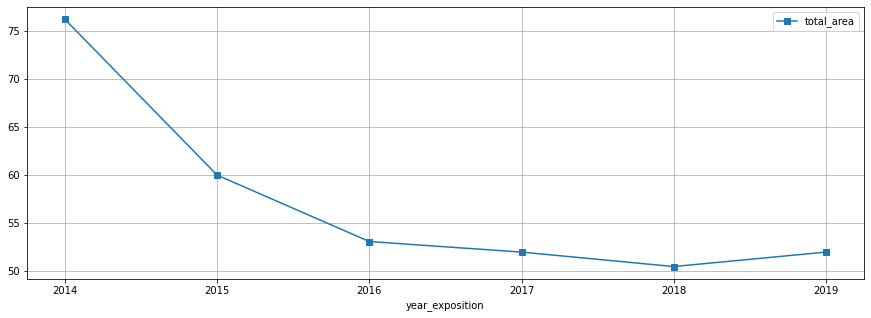

In [111]:
data.pivot_table(index='year_exposition', values='total_area', aggfunc='median').plot(grid=True, style='s-', figsize=(15, 5));

In [112]:
data.pivot_table(index='year_exposition', values=['total_area', 'price_sq_m'], aggfunc='median')

,price_sq_m,total_area
year_exposition,,
2014,106901.90,76.18
2015,93364.78,60.00
2016,91743.12,53.10
2017,92569.66,52.00
2018,95696.35,50.50
2019,103260.87,52.00


Если посмотреть на график изменения стоимости по годам, то можно увидеть, что с 2014 по 2016 год наблюдалось существенное снижение средней стоимости 1 кв.м. (на порядка 13 тыс. руб. за кв.м.), после чего стоимость за кв.м. постепенно восстанавливалась к 2019 году. 

На графике изменения средней площади квартир по годам можно увидеть, что средняя площадь продаваемых квартир также значительно уменьшилась.

Это может говорить о кризисе в 2014-2016 гг. на рынке жилья и в экономике страны в целом, и как следствие, о снижении покупательской способности населения.

#### Средняя цена одного кв.м. в 10 населённых пунктах с наибольшим числом объявлений

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [113]:
top_10 = data.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['count', 'median'])
top_10.columns = ['count', 'median']
top_10 = top_10.sort_values('count', ascending=False).astype('int').head(10)
top_10

,count,median
locality_name,,
Санкт-Петербург,15651,104790
Мурино,586,86250
Кудрово,470,95555
Шушары,439,76829
Всеволожск,398,65789
Пушкин,369,100000
Колпино,338,74723
Парголово,327,91642
Гатчина,307,67796


#### Средняя цена километра

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [114]:
mean_price_sqm_spb = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='price_sq_m', aggfunc='mean')
    .astype('int')
    .reset_index()
)
mean_price_sqm_spb

,city_centers_nearest_km,price_sq_m
0,0,187324
1,1,166603
2,2,146662
3,3,129526
4,4,137413
5,5,146978
6,6,152277
7,7,141399
8,8,120539
9,9,110190


Для наглядности построим столбчатую диаграмму.

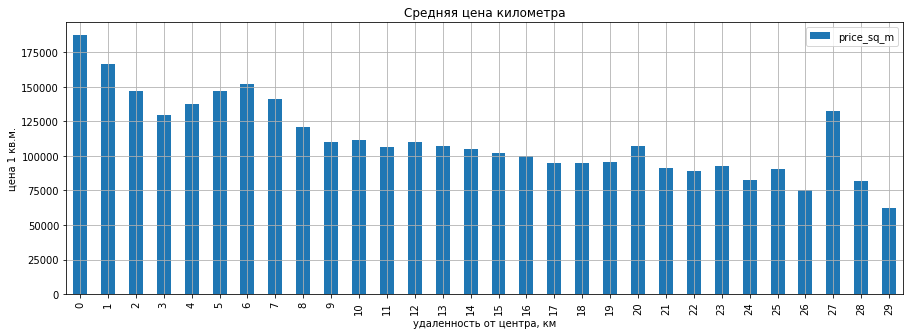

In [115]:
mean_price_sqm_spb.plot(x='city_centers_nearest_km', y='price_sq_m', kind='bar', grid=True, figsize=(15, 5), 
                        title='Средняя цена километра').set(xlabel='удаленность от центра, км', ylabel='цена 1 кв.м.');

In [116]:
# выброс на 27 км
data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,True,...,1496.0,0,NaN,128,193918.92,1,11,2017,другой,27
5961,6,2250000.0,32.0,2018-02-27,1,2.60,2,16.5,2,True,...,NaN,0,NaN,178,70312.50,1,2,2018,последний,27


Из диаграммы видно, что в радиусе 7 км цена 1 кв.м. держится выше 125 тыс. руб., это условно можно считать центром города.
Цена 1 кв.м. самая высокая в самом центре и начиная с 8 км удаления от центра начинает постепенно и равномерно снижаться.
По ходу снижения цены встречаюся выбросы, обусловленные характеристиками конкретных объектов или групп объектов (например, выброс на 27 км связан с расположенным в данной локации дорогим объектом).

### Общий вывод

Подведем итоги проведенного исследования.
В наше распоряжение были предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Прежде, чем анализировать полученные данные была проведена предобработка, которая выявила некоторые проблемы, а именно:

- были обнаружены пропущенные значения;

- у некоторых значений в столбцах был неподходящий тип данных;

- встречались аномальные значения;

- имелись неявные дубликаты.

Пропущенные значения были с осторожностью заполнены подходящими по смыслу данными и/или соответствующими медианными значениями во избежание искажения общего облика данных. Аномальные значения были заменены на типичные медианные либо логически подходящие. Неявные дубликаты были устранены, приведены к единообразию.

Там, где заполнить пропуски не представлялось возможным, строки были удалены.

Причинами пропусков в столбцах может являться то, что в связи с особенностями конкретного объекта, заполнение конкретного столбца по той или иной причине игнорировалось пользователем, а также человеческий фактор или сбой при выгрузке данных.

Для дальнейшего анализа в таблицу были добавлены дополнительные столбцы с необходимыми параметрами.

Далее был проведен исследовательский анализ данных, который дал следующие результаты:

- общая площадь объектов, представленных в таблице варьируется в диапазоне от 12 до 900 кв.м., подавляющее число объектов имеет общую площадь от 25 до 75 кв.м. с пиковым значением в районе 45 кв.м.

- подавляющее число объектов имеет жилую площадь от 15 до 45 кв.м. с пиковыми значениями в районе 18 и 30 кв.м.

- подавляющее число объектов имеет площадь кухни от 5 до 15 кв.м.

- стоимость объектов, представленных в таблице варьируется в диапазоне от 430 тыс. до 763 млн. руб., подавляющее число объектов имеет стоимость от 2 до 7 млн.руб. с пиковым значением в районе 3.5-4 млн. руб.

- большая часть объектов имеет от 1 до 3 комнат.

- высота потолков у объектов, представленных в таблице варьируется в диапазоне от 2.2 до 10 метров,  подавляющее число объектов имеет высоту потолка от 2.5 до 3 метров с пиковым значением в районе 2.7 метров.

- этаж у объектов, представленных в таблице варьируется в диапазоне от 1 до 33, большая часть объектов располагается на в диапазоне с 1 по 10 этаж.

- в разрезе "первый-последний этаж", большая часть объектов располагается не на первом и не на последнем этаже, а на других этажах.

- общее количество этажей варьируется в диапазоне от 1 до 60, большая часть объектов имеет общее количество этажей 5 или 9.

- расстояние до центра города у объектов, представленных в таблице (и для которых соответствующая информация была указана) достигает 66 км, подавляющее число объектов находится на удалении от центра от 3 до 19 км с пиковым значением в районе 12 км.

- расстояние до ближайшего аэропорта у объектов, представленных в таблице достигает 84869 метров, подавляющее число объектов находится на удалении от аэропорта от 10 до 55 км с пиковым значением в районе 25 км.

- расстояние до ближайшего парка у объектов, представленных в таблице достигает 3190 метров (если такая информация указана), большая часть объектов находится на удалении от парка до 1 км.

- по дням недели публикации объявлений распределены равномерно, на будний день приходится в среднем в два раза больше объявлений, чем на выходной день.
В разрезе помесячного распределения объвлений пики наблюдаются с февраля по апрель и с сентября по ноябрь.

Изучили насколько быстро продавались квартиры и получили следующие результаты:

- среднее значение количества дней, за которое продавали квартиру: 180 дней

- медианное значение количества дней, за которое продавали квартиру: 95 дней

Большая часть квартир продается примерно в первые 100 дней.

Сделали вывод, что если квартиру продали в пределах 45 дней, то такую сделку можно считать быстрой, а продажу дольше 231 дня можно считать долгой. Если же квартира продается более 500 дней, то такая продажа будет аномально долгой.

Изучили факторы, влияющие на стоимость. Вот что получилось:

- прослеживается взаимосвязь между стоимостью квартиры и ее общей, жилой и кухонной площадью, что логично, но она не слишком сильная, так как на стоимость помимо этих факторов влияет еще множество других. Взаимосвязь между стоимостью и количеством комнат также имеется, ведь как правило, чем больше комнат, тем больше площадь, хотя, это опять же зависит от площади комнат.

- стоимость первых и последних этажей ниже, чем стоимость других этажей, при этом первый этаж, как правило, оценивается ниже, чем последний.

- стоимость кв. метра в объявлениях, опубликованных во вторник и среду выше и к субботе постепенно снижается, после чего ко вторнику обратно повышется. Но разница между пиками значений незначительная, до 2 тыс. руб. за кв.м. Скорее всего, это может быть связано с большей деловой активностью в начале рабочей недели.

- в разрезе помесячного изменения стоимости жилья: пиковые значения стоимости за квадратный метр объекты достигают в апреле и августе. Спад между этими пиками может быть обусловлен сезонностью отпусков и падением спроса в эти периоды. Разница между пиками значений достигает 4 тыс. руб. за кв.м.

- в разрезе изменения стоимости по годам: с 2014 по 2016 год наблюдалось существенное снижение средней стоимости 1 кв.м. (на порядка 13 тыс. руб. за кв.м.), после чего стоимость за кв.м. постепенно восстанавливалась к 2019 году. Это может говорить о кризисе в 2014-2016 гг. на рынке жилья и в экономике страны в целом, и как следствие, о снижении покупательской способности населения.

Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая стоимость 1 кв.м. в Санкт-Петербурге (114876 руб./кв.м.), самая низкая - в Выборге (75424 руб./кв.м.).

В конце исследования была посчитана зависимость стоимости жилья от расстояния до центра города. В радиусе 7 км цена 1 кв.м. держится выше 125 тыс. руб., это условно можно считать центром города.
Цена 1 кв.м. самая высокая в самом центре и начиная с 8 км удаления от центра начинает постепенно и равномерно снижаться.
По ходу снижения цены встречаюся выбросы, обусловленные характеристиками конкретных объектов или групп объектов (например, выброс на 27 км связан с расположенным в данной локации дорогим объектом).